# Julia Project

## Q1

In [1]:
using Pkg
Pkg.add("Statistics")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.9/Project.toml`
  [10745b16] + Statistics v1.9.0
    Updating `~/.julia/environments/v1.9/Manifest.toml`
  [37e2e46d] + LinearAlgebra
  [2f01184e] + SparseArrays
  [10745b16] + Statistics v1.9.0
  [e66e0078] + CompilerSupportLibraries_jll v1.0.5+0
  [4536629a] + OpenBLAS_jll v0.3.21+4
  [bea87d4a] + SuiteSparse_jll v5.10.1+6
  [8e850b90] + libblastrampoline_jll v5.8.0+0
Precompiling project...
  ✓ CompilerSupportLibraries_jll
  1 dependency successfully precompiled in 0 seconds. 18 already precompiled.


In [12]:
using Pkg
Pkg.add("StatsBase")

   Resolving package versions...
   Installed StatsAPI ──────────── v1.7.0
   Installed LogExpFunctions ───── v0.3.26
   Installed Compat ────────────── v4.10.0
   Installed OrderedCollections ── v1.6.3
   Installed DataAPI ───────────── v1.15.0
   Installed DataStructures ────── v0.18.15
   Installed Missings ──────────── v1.1.0
   Installed DocStringExtensions ─ v0.9.3
   Installed StatsBase ─────────── v0.34.2
   Installed SortingAlgorithms ─── v1.2.0
   Installed IrrationalConstants ─ v0.2.2
    Updating `~/.julia/environments/v1.9/Project.toml`
  [2913bbd2] + StatsBase v0.34.2
    Updating `~/.julia/environments/v1.9/Manifest.toml`
  [34da2185] + Compat v4.10.0
  [9a962f9c] + DataAPI v1.15.0
  [864edb3b] + DataStructures v0.18.15
  [ffbed154] + DocStringExtensions v0.9.3
  [92d709cd] + IrrationalConstants v0.2.2
  [2ab3a3ac] + LogExpFunctions v0.3.26
  [e1d29d7a] + Missings v1.1.0
  [bac558e1] + OrderedCollections v1.6.3
  [a2af1166] + SortingAlgorithms v1.2.0
  [82ae8749] + Stats

In [46]:
function most_common_word(input_string::AbstractString)
    if isempty(input_string)
        return "Input string is empty"
    end

    # Split the string on spaces, remove punctuation, and make it lowercase
    # Using regular expression to specify multiple delimiters
    words = split(lowercase(input_string), r"[ ,.!?\;:\"']+")

    if isempty(words)
        return "No words found in the input string"
    end

    # Remove empty strings resulting from consecutive punctuation marks
    words = filter(x -> !isempty(x), words)

    # Count the occurrences of each word
    word_counts = Dict{String, Int}()
    for word in words
        word_counts[word] = get(word_counts, word, 0) + 1
    end

    # Find the most common word(s)
    max_count = maximum(values(word_counts))
    most_common = [word for (word, count) in word_counts if count == max_count]

    return most_common
end

# Test the function
test_string = "I bought a sandwich with a side of chips! I like it!"
result = most_common_word(test_string)
println("Most common word(s): $result")


Most common word(s): ["a", "i"]


## Q2

In [20]:
using Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")

   Resolving package versions...
   Installed TableTraits ───────────────── v1.0.1
   Installed DataValueInterfaces ───────── v1.0.0
   Installed IteratorInterfaceExtensions ─ v1.0.0
   Installed PooledArrays ──────────────── v1.4.3
   Installed SentinelArrays ────────────── v1.4.1
   Installed Tables ────────────────────── v1.11.1
   Installed WorkerUtilities ───────────── v1.6.1
   Installed WeakRefStrings ────────────── v1.4.2
   Installed CodecZlib ─────────────────── v0.7.3
   Installed FilePathsBase ─────────────── v0.9.21
   Installed InlineStrings ─────────────── v1.4.0
   Installed TranscodingStreams ────────── v0.10.2
   Installed CSV ───────────────────────── v0.10.11
    Updating `~/.julia/environments/v1.9/Project.toml`
  [336ed68f] + CSV v0.10.11
    Updating `~/.julia/environments/v1.9/Manifest.toml`
  [336ed68f] + CSV v0.10.11
  [944b1d66] + CodecZlib v0.7.3
  [e2d170a0] + DataValueInterfaces v1.0.0
  [48062228] + FilePathsBase v0.9.21
  [842dd82b] + InlineStrings v1.4.

### Read in df

In [192]:
using CSV
using DataFrames

# Specify the file path to your CSV file
file_path = "/Users/jakobkuemmerle/Documents/Python_Class/homework4/movie_reviews.csv"

# Read the CSV file into a DataFrame
df = CSV.File(file_path) |> DataFrame

# Print the number of rows in the dataset
println("Number of rows in the dataset: ", nrow(df))


Number of rows in the dataset: 16638


In [193]:
first(df,1)

Row,movie_title,movie_info,rating,genre,directors,in_theaters_date,on_streaming_date,runtime_in_minutes,critic_rating,critic_count,audience_rating,audience_count
,String,String?,String7,String?,String?,String15?,String15?,Int64?,Int64,Int64,Int64?,Int64?
1,Percy Jackson & the Olympians: The Lightning Thief,A teenager discovers he's the descendant of a Greek god and sets out on an adventure to settle an on-going battle between the gods.,PG,"Action & Adventure, Comedy, Drama, Science Fiction & Fantasy",Chris Columbus,2/12/10,6/29/10,83,49,144,53,254287


In [194]:
Pkg.add("Missings")

LoadError: UndefVarError: `Pkg` not defined

### Analysis of dates shows: 
- Some movies have NA for in theatre date, we can take streaming date and subtract the average duration between both dates to derive the approximate theatre date
- There are two movies that don't have any dates, we drop those
- we have to convert the dates, movies after the year "19" are 1900s movies, we can see this based on frequency pattern

In [195]:
# Drop the 2 movies with no dates at all
dropmissing!(df, :on_streaming_date)
# Print the number of rows in the dataset
println("Number of rows in the dataset: ", nrow(df))

Number of rows in the dataset: 16636


#### Calculate the average duration between streaming and theatre date for suitable timeframe

In [196]:
using DataFrames
using Dates

calc_df = copy(df)

# Drop missing values in 'in_theaters_date'
dropmissing!(calc_df, :in_theaters_date)

println("Number of rows in the temporary dataset: ", nrow(calc_df))

# Convert streaming date to Date
calc_df.on_streaming_date .= Date.(replace.(string.(calc_df.on_streaming_date), r"(\d+)/(\d+)/(\d+)" => s"20\3-\1-\2"), "yyyy-mm-dd")

# Convert 'in_theaters_date' column to Date type
calc_df.in_theaters_date .= Date.(replace.(string.(calc_df.in_theaters_date), r"(\d+)/(\d+)/(\d+)" => s"20\3-\1-\2"), "yyyy-mm-dd")

# Filter rows where streaming date is between 2005-01-01 and 2015-12-31
filtered_df = filter(row -> Dates.year(row.in_theaters_date) in 2005:2015, calc_df)

# Calculate the duration between theatre and streaming date for the filtered rows
filtered_df.time_theatre_to_streaming = filtered_df.on_streaming_date - filtered_df.in_theaters_date

# Convert durations to days
filtered_df.time_theatre_to_streaming_days = floor.(Int, Dates.days.(filtered_df.time_theatre_to_streaming))

# Calculate the mean duration in days for the filtered rows
avg_time_theatre_to_streaming = round(mean(filtered_df.time_theatre_to_streaming_days))

# Display the result
println("Average time from theatre to streaming (in days) for the years 2005-2015: $avg_time_theatre_to_streaming")

Number of rows in the temporary dataset: 15823
Average time from theatre to streaming (in days) for the years 2005-2015: 193.0


#### Use Avg to fill missing values in in_theaters_date of df

In [197]:
df.on_streaming_date .= Date.(replace.(df.on_streaming_date, r"(\d+)/(\d+)/(\d+)" => s"20\3-\1-\2"), "yyyy-mm-dd")
future_dates = df.on_streaming_date .> Date(2020, 1, 1)
df.on_streaming_date[future_dates] .-= Year(100)

# Subtract avg_time_theatre_to_streaming days from on_streaming_date to create 'approximates_theatre_date'
df.approximates_theatre_date = df.on_streaming_date .- Day(avg_time_theatre_to_streaming)
df.approximates_theatre_date .= Dates.format.(df.approximates_theatre_date, "m/d/yy")
print("test")

# Fill missing values in 'in_theaters_date' with 'approximates_theatre_date'
df.in_theaters_date .= coalesce.(df.in_theaters_date, df.approximates_theatre_date)

# Convert 'in_theaters_date' column to Date type
df.in_theaters_date .= Date.(replace.(df.in_theaters_date, r"(\d+)/(\d+)/(\d+)" => s"20\3-\1-\2"), "yyyy-mm-dd")

future_dates = df.in_theaters_date .> Date(2020, 1, 1)
df.in_theaters_date[future_dates] .-= Year(100)

# Create a new 'release_year' column
df.release_year = year.(df.in_theaters_date)

# Drop the 'approximates_theatre_date' column
select!(df, Not(:approximates_theatre_date))
# Print the number of rows in the dataset
println("Number of rows in the dataset: ", nrow(df))

testNumber of rows in the dataset: 16636


#### Filter Movies before 2010 and lower than average Audience Count before 2010

In [198]:
using DataFrames

# Drop movies without audience count since they are definitely not popular
df_filtered = dropmissing(df, [:audience_count])
df_filtered = df_filtered[df_filtered.release_year .< 2010, :]

# Calculate the average number of audience reviews for the 'audience_count' column
average_reviews_before_2010 = mean(df_filtered[!, :audience_count])

# Filter popular movies using df_filtered instead of df
popular_movies = df_filtered[df_filtered.audience_count .> average_reviews_before_2010, :]

# Print the number of rows in the filtered dataset
println("Number of rows in the filtered dataset: ", nrow(popular_movies))


Number of rows in the filtered dataset: 1013


In [199]:
using DataFrames

rating_counts = combine(groupby(popular_movies, :rating), :rating => length => :count)

# Calculate the percentage of movies in each rating category
rating_counts[!,:percentage] = rating_counts.count / nrow(popular_movies) * 100

# Display the summary table
println(rating_counts)

# Share an insight
max_rating = argmax(rating_counts.count)
max_rating_category = rating_counts.rating[max_rating[1]]
max_percentage = maximum(rating_counts.percentage)

println("Insight: The most common rating is $max_rating_category with $max_percentage% of movies.")


5×3 DataFrame
 Row │ rating   count  percentage 
     │ String7  Int64  Float64    
─────┼────────────────────────────
   1 │ PG         199   19.6446
   2 │ R          327   32.2804
   3 │ NR           2    0.197433
   4 │ G           65    6.41658
   5 │ PG-13      420   41.461
Insight: The most common rating is PG-13 with 41.46100691016782% of movies.


#### New Insight: Number of Genres per Movie

In [200]:
using DataFrames

# Replace missing values with "Others" in the "genre" column
popular_movies[!, :genre] .= coalesce.(popular_movies.genre, "Others")

# Create the "number_of_genres" feature
popular_movies[!, :number_of_genres] = count.(occursin.(", ", popular_movies.genre)) .+ 1;

In [202]:
using DataFrames

# Create a summary table
summary_table = combine(groupby(popular_movies, :number_of_genres), :number_of_genres => length => :count)

# Display the summary table
println(summary_table)

# Share an insight
max_genres = argmax(summary_table.count)
max_genres_count = summary_table.number_of_genres[max_genres[1]]

println("The most common number of genres is $max_genres_count.")

2×2 DataFrame
 Row │ number_of_genres  count 
     │ Int64             Int64 
─────┼─────────────────────────
   1 │                1    209
   2 │                2    804
The most common number of genres is 2.


## Q3

In [82]:
using Pkg
Pkg.add("Plots")


   Resolving package versions...
   Installed Opus_jll ───────────────────── v1.3.2+0
   Installed libfdk_aac_jll ─────────────── v2.0.2+0
   Installed LERC_jll ───────────────────── v3.0.0+1
   Installed GR_jll ─────────────────────── v0.72.10+0
   Installed JpegTurbo_jll ──────────────── v2.1.91+0
   Installed x265_jll ───────────────────── v3.5.0+0
   Installed LoggingExtras ──────────────── v1.0.3
   Installed Xorg_xkbcomp_jll ───────────── v1.4.6+0
   Installed Measures ───────────────────── v0.3.2
   Installed RelocatableFolders ─────────── v1.0.1
   Installed Contour ────────────────────── v0.6.2
   Installed Grisu ──────────────────────── v1.0.2
   Installed ConcurrentUtilities ────────── v2.3.0
   Installed Formatting ─────────────────── v0.4.2
   Installed Xorg_xcb_util_wm_jll ───────── v0.4.1+1
   Installed RecipesPipeline ────────────── v0.6.12
   Installed PlotUtils ──────────────────── v1.3.5
   Installed OpenSSL ────────────────────── v1.4.1
   Installed Xorg_libpthread_

In [93]:
using Pkg
Pkg.add("DataFramesMeta")


   Resolving package versions...
   Installed Chain ────────── v0.5.0
   Installed DataFramesMeta ─ v0.14.1
    Updating `~/.julia/environments/v1.9/Project.toml`
  [1313f7d8] + DataFramesMeta v0.14.1
    Updating `~/.julia/environments/v1.9/Manifest.toml`
  [8be319e6] + Chain v0.5.0
  [1313f7d8] + DataFramesMeta v0.14.1
Precompiling project...
  ✓ Chain
  ✓ DataFramesMeta
  2 dependencies successfully precompiled in 2 seconds. 173 already precompiled.


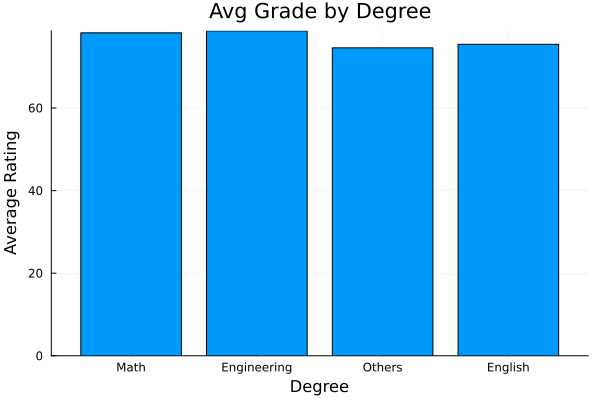

In [105]:
using DataFrames
using Plots

# Example DataFrame (replace this with your actual DataFrame)
df = DataFrame(
    grades = rand(50:100, 100),
    degree = rand(["Engineering", "Math", "English", "Others"], 100)
)

# Calculate the mean audience rating for each rating category
avg_grades = combine(groupby(df, :degree), :grades => mean => :mean_grades)

# Create a bar chart showing the average audience rating by rating
bar_chart = bar(avg_grades.degree, avg_grades.mean_grades,
                title="Avg Grade by Degree", xlabel="Degree", ylabel="Average Rating",
                legend=false)

# Show the bar chart
display(bar_chart)


# Explation of package/library and Q4 in attached PDF